In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

### Step 1: Reading and Understanding the Data

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\day.csv")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
data.shape

(730, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# To check if there are any missing values in the dataset
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#convert the datatype of dteday column to datetime
data['dteday'] = pd.to_datetime(data['dteday'],format='%d-%m-%Y')
data['dteday'].dtype

dtype('<M8[ns]')

In [8]:
data['year'] = pd.DatetimeIndex(data['dteday']).year
data['month'] = pd.DatetimeIndex(data['dteday']).month

In [9]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [10]:
data.drop(['yr','mnth'],axis=1,inplace=True)
data.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [11]:
#Dropping unnecessary columns.

data.drop(['holiday','dteday','instant','casual','registered'],axis=1,inplace=True)
data.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


### Step 2: Encoding the Labels & Visualization

In [12]:
# Season
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
data['season'] = data['season'].map(codes)

In [13]:
data.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


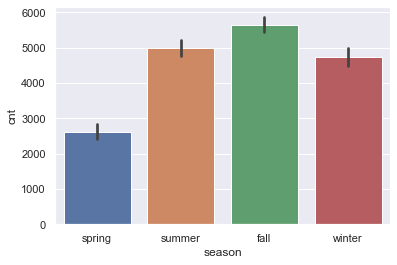

In [14]:
sns.barplot('season','cnt',data=data)

Bike Rentals are more during the Fall(Monsoon) season.


In [15]:
# weathersit

codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
data['weathersit'] = data['weathersit'].map(codes)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


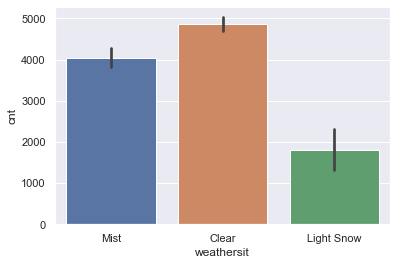

In [16]:
sns.barplot('weathersit','cnt',data=data)

Bikes seem to be rented more in clear weathersuit

In [17]:
# workingday
codes = {1:'working_day',0:'Holiday'}
data['workingday'] = data['workingday'].map(codes)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


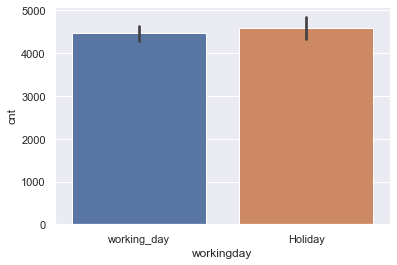

In [18]:
sns.barplot('workingday','cnt',data=data)

In [19]:
# year

codes = {2019:1,2018:0}
data['year'] = data['year'].map(codes)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


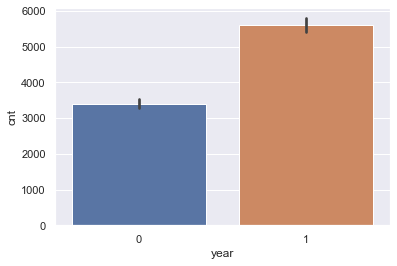

In [20]:
sns.barplot('year','cnt',data=data)

Bike Rental popularity has increased in 2019 when compared to 2018.

In [21]:
# month 
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['month'] = data['month'].map(codes)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


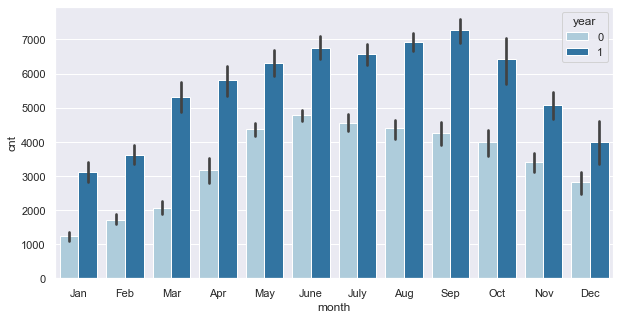

In [22]:
plt.figure(figsize=(10,5))
sns.barplot('month','cnt',hue='year',data=data,palette='Paired')

In [23]:
#weekDay

In [24]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['weekday'] = data['weekday'].map(codes)

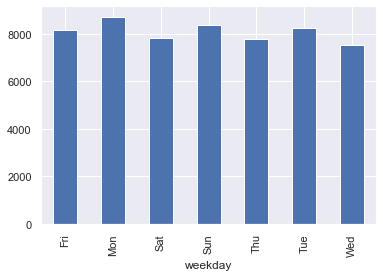

In [25]:
data.groupby('weekday')['cnt'].max().plot(kind='bar')

Bike Rentals are maximum on Sunday and Monday

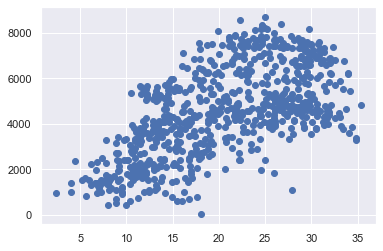

In [26]:
# temp
plt.scatter('temp','cnt',data=data)

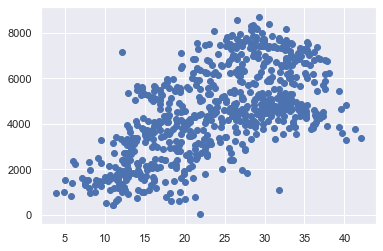

In [27]:
# atemp
plt.scatter('atemp','cnt',data=data)

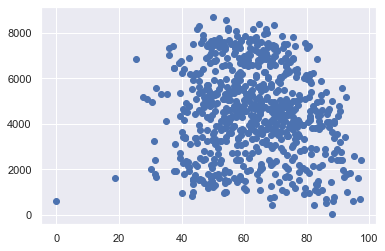

In [28]:
# Humidity
plt.scatter('hum','cnt',data=data)

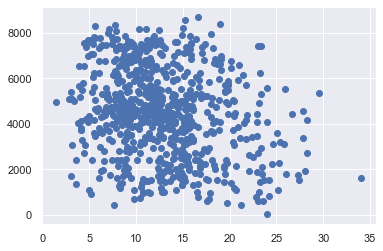

In [29]:
#  Windspeed
plt.scatter('windspeed','cnt',data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


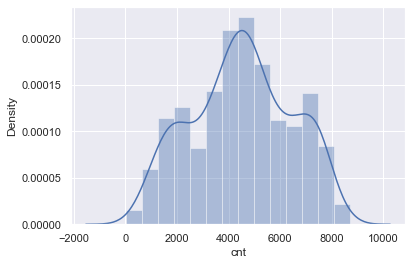

In [30]:
sns.distplot(data['cnt'])

### Step 3: Visualizing the Relationship among variables

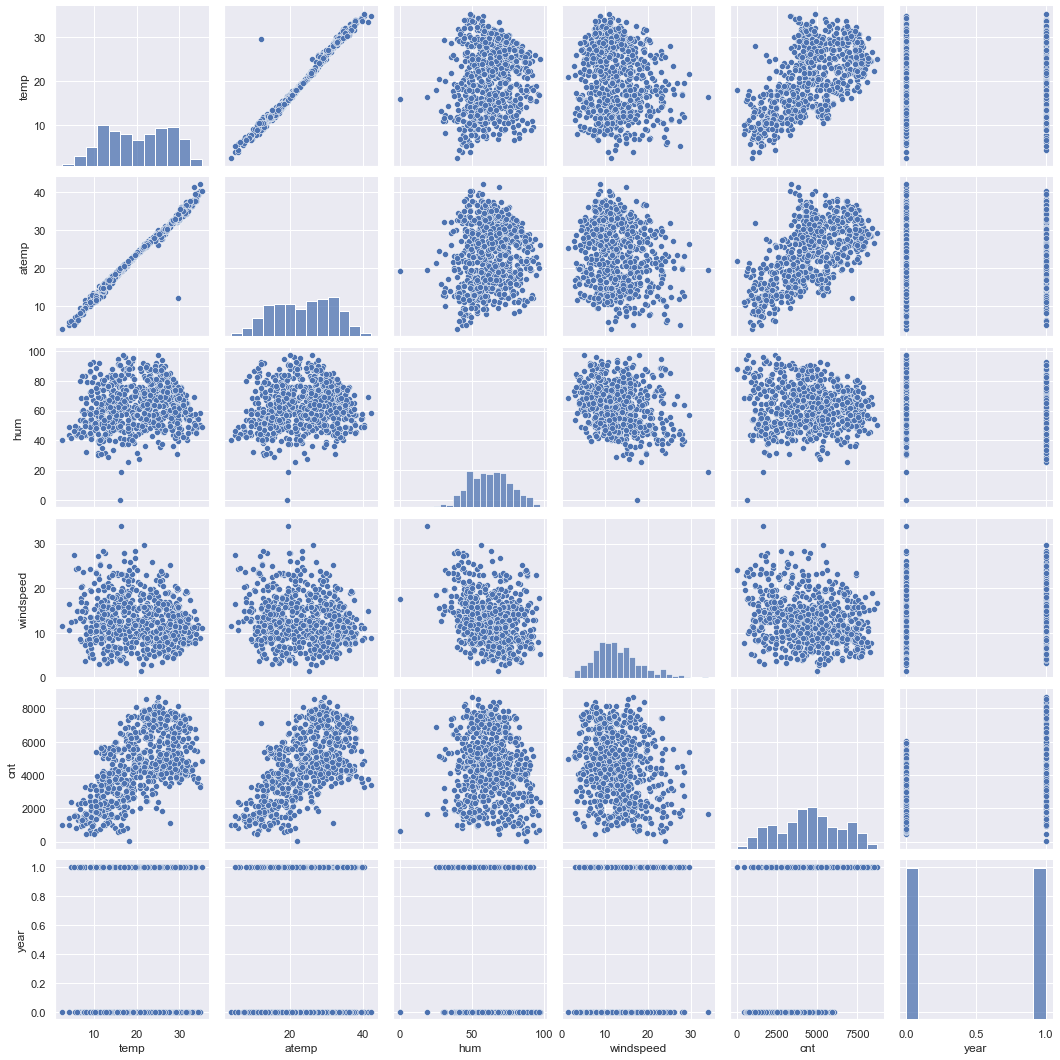

In [31]:
sns.pairplot(data)

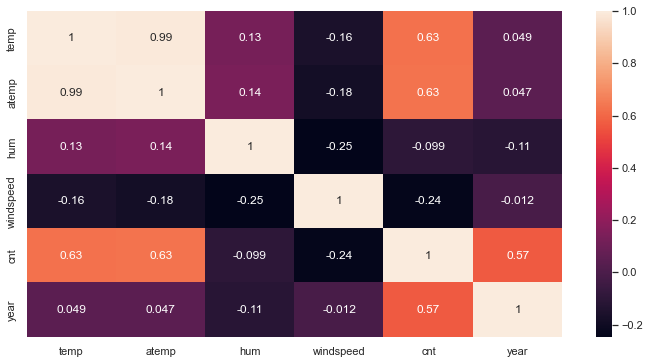

In [32]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot=True)

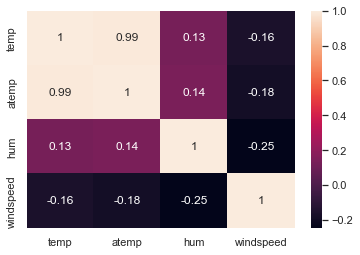

In [33]:
data1= data[['temp','atemp','hum','windspeed']]
sns.heatmap(data1.corr(),annot=True)

In [34]:
data.drop('atemp',axis=1,inplace=True)

In [35]:
data.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


### Step 4 : Dealing With Categorical Variables

In [36]:
seasons = pd.get_dummies(data['season'],drop_first=True)

working_day = pd.get_dummies(data['workingday'],drop_first=True)

weather= pd.get_dummies(data['weathersit'],drop_first=True)

month= pd.get_dummies(data['month'],drop_first=True)

week_day= pd.get_dummies(data['weekday'],drop_first=True)

In [37]:
data= pd.concat([data,seasons,working_day,weather,month,week_day],axis=1)

In [38]:
data.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


In [39]:
#Dropping the categorical variables
data.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [40]:
data.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Step 5: Splitting the Data into Training and Testing Sets

In [41]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [43]:
num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

<ipython-input-43-816a8eb5978c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


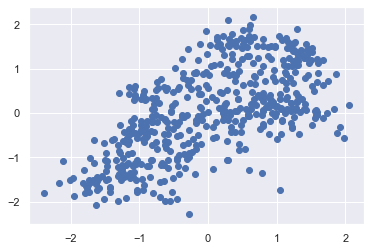

In [44]:
plt.scatter('temp','cnt',data=df_train)

In [45]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 6: Building a linear model

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          3.16e-176
Time:                        11:37:22   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp            0.4029      0.027     14.765      0.000       0.349       0.457
year            1.0473      0.039     27.009      0.000       0.971       1.123
spring         -0.6760      0.057    -11.825      0.000      -0.788      -0.564
working_day     0.3710      0.134      2.777      0.006       0.109       0.633
Light Snow     -1.2971      0.116    -11.212      0.000      -1.524      -1.070
Mist           -0.3619      0.041     -8.739      0.000      -0.443      -0.281
July           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep             0.2874      0.074      3.884      0.000       0.142       0.433
Mon             0.4613      0.142      3.259      0.001       0.183       0.739
Sun             0.4451      0.142      3.131      0.002       0.166       0.724
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X_train1= sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train1).fit() 

In [54]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          3.16e-176
Time:                        11:37:22   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp            0.4029      0.027     14.765      0.000       0.349       0.457
year            1.0473      0.039     27.009      0.000       0.971       1.123
spring         -0.6760      0.057    -11.825      0.000      -0.788      -0.564
working_day     0.3710      0.134      2.777      0.006       0.109       0.633
Light Snow     -1.2971      0.116    -11.212      0.000      -1.524      -1.070
Mist           -0.3619      0.041     -8.739      0.000      -0.443      -0.281
July           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep             0.2874      0.074      3.884      0.000       0.142       0.433
Mon             0.4613      0.142      3.259      0.001       0.183       0.739
Sun             0.4451      0.142      3.131      0.002       0.166       0.724
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X_train_new= X_train1.drop('const',axis=1)

In [56]:
#Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.58
2,spring,2.10
0,temp,2.02
1,year,2.02
5,Mist,1.58
8,Mon,1.39
6,July,1.38
9,Sun,1.33
7,Sep,1.18
4,Light Snow,1.07


All the variables have VIF less than 5 

### Step 7: Residual Analysis of the train data

In [57]:
y_train_pred = lm1.predict(X_train1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

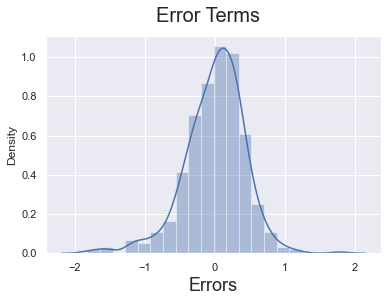

In [58]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Step 8: Making Predictions

In [59]:
num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars]= scaler.transform(df_test[num_vars])

<ipython-input-59-1d33dc79219b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars]= scaler.transform(df_test[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [60]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [61]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [62]:
y_test_pred = lm1.predict(X_test_new)

### Step 9: Model Evaluation

Text(0, 0.5, 'Predictions')

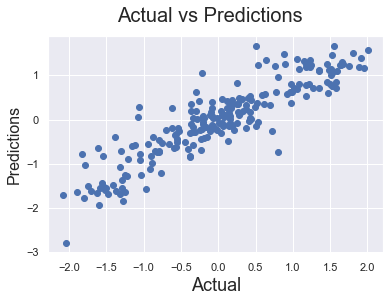

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                          
plt.ylabel('Predictions', fontsize=16)                         

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8051381112407531

In [65]:
lm1.params

const         -0.589286
temp           0.402907
year           1.047269
spring        -0.676029
working_day    0.371034
Light Snow    -1.297115
Mist          -0.361875
July          -0.313567
Sep            0.287442
Mon            0.461295
Sun            0.445060
dtype: float64

#### Conclusion:
The top 4 variables that are seen effecting and benefitting the Bike Rental count are as follows:<br>

Spring season : -0.6760<br>
Temperature : 0.4029<br>
Mist        :  -0.361875<br>
working_day    0.371034<br>
